In [1]:
import numpy, sys, math
from  matplotlib import pyplot as plt
import numpy as np
import scipy.linalg as cp

def implicit(alpha,u,N,T):
    N = N+1
    aux = np.zeros(N)
    aux[0] = 1.+2.*alpha
    aux[1] = -alpha
    A = cp.toeplitz(aux)
    A[0] = A[-1]= 0
    A[0,0] = A[-1,-1] = 1
    A = cp.inv(A, overwrite_a=True, check_finite=True)
    for ii in range(1,T):
        uaux = u[ii-1]
        tt = A@uaux
        u[ii] = tt
    return(u)

N  =   100
dt =   5e-5
T =   5000

u = numpy.zeros((T,N+1),numpy.double)
(x,dx) = numpy.linspace (0,1,N+1, retstep=True)
alpha = dt/(dx**2)
print(x,dx, alpha)

#Initial coditions
u[0,-1] = 1.
#print(u)


[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99 1.  ] 0.01 0.5


In [2]:
u = implicit(alpha,u,N,T)
#print(u[-1])

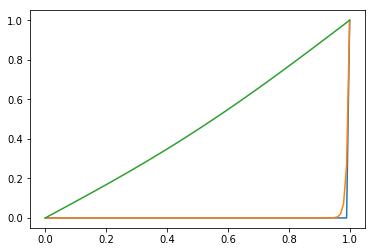

In [3]:
plt.plot(x, u[0])
plt.plot(x, u[1])
#plt.plot(x, u[2])
#plt.plot(x, u[3])
plt.plot(x, u[-1])
plt.show()

In [4]:
#print(u[0])
#print(u[1])
#print(u[-1])

In [5]:
y = dt*np.linspace(0,T,T+1)
%matplotlib qt
fig, ax = plt.subplots()
im = ax.pcolormesh(x,y,u,cmap='jet')
cbar = fig.colorbar(im)
plt.xlabel('Length [L]')
plt.ylabel('Time [dt]')

Text(0,0.5,'Time [dt]')